# Problem Statement

Predicting Survival in the Titanic Data Set
We will be using a decision tree to make predictions about the Titanic data set from Kaggle. 
This data set provides information on the Titanic passengers and can be used to predict whether a passenger survived or not.

Variable	Definition	      Key

survival	Survival	       0 = No, 1 = Yes

pclass	    Ticket class	   1 = 1st, 2 = 2nd, 3 = 3rd

sex	        Sex	

Age	       Age in years	

sibsp	# of siblings / spouses aboard the Titanic	

parch	# of parents / children aboard the Titanic	

ticket	Ticket number	

fare	Passenger fare	

cabin	Cabin number	

embarked	Port of Embarkation	 C = Cherbourg, Q = Queenstown, S = Southampton



Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [65]:
#Hide all the warnings in jupyter notebook
import warnings 
warnings.filterwarnings('ignore')

In [66]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,mean_absolute_error
import scikitplot
from sklearn.cross_validation import KFold
from  sklearn.model_selection import cross_val_predict
from sklearn.cross_validation import cross_val_score
from IPython.display import Image, display
import pydotplus
%matplotlib inline

In [67]:
url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
df = pd.read_csv(url)

In [68]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# SUMMARY STATISTCS

In [69]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### Note : 

It is evident that Age,cabin and embarked have null values associated with them hence the total count specific to each row does not matches.


In [71]:
#count of null values in Age column
df.Age.isnull().sum()

177

In [72]:
#count of null values in Embarked Column
df.Embarked.isnull().sum()

2

In [73]:
#count of null values in Cabin Column
df.Cabin.isnull().sum()

687

# DATA PREPROCESSING 

In [74]:
#Age is a continuous variable .It contains 177 null varibales
#Imputing null values in Age column with median of Age values
df['Age'] = df['Age'].fillna(df['Age'].median())

In [75]:
df.Age.isnull().sum()

0

In [76]:
df_titanic = df.drop('Cabin',axis=1)

In [77]:
#drop null values from df_titanic
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [78]:
#Embarked column contains 2 null values .This can be removed without much affecting the model algorithm
df_titanic.dropna(inplace=True)

In [79]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


# DATA ANALYSIS THROUGH VISUALIZATION

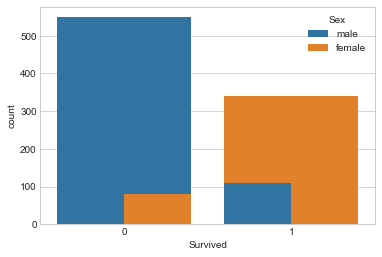

In [80]:
sb.set_style('whitegrid')
sb.countplot(x='Survived',data=df_titanic)
sb.countplot(x='Survived',data=df_titanic,hue='Sex')

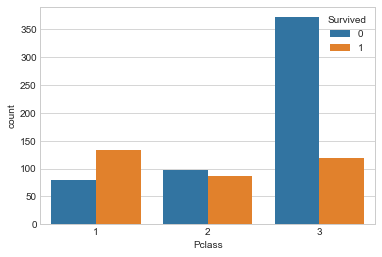

In [81]:
sb.countplot(x='Pclass',data=df_titanic,hue='Survived')

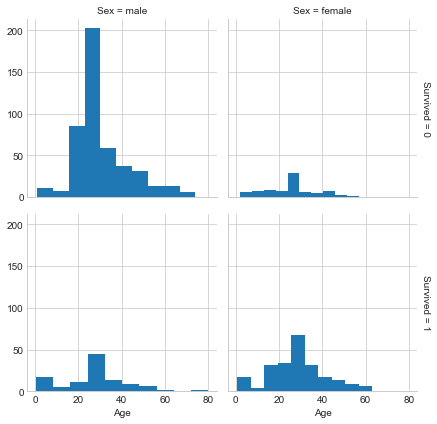

In [82]:
sb.FacetGrid(df_titanic, row="Survived", col="Sex", margin_titles=True).map(plt.hist, "Age")


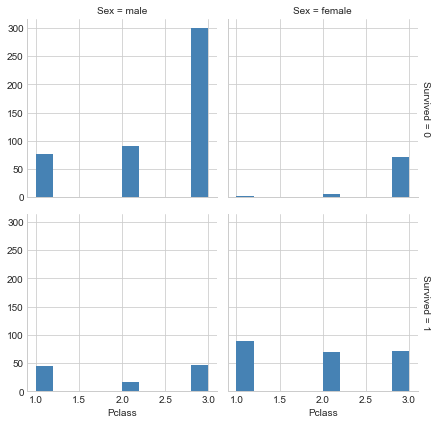

In [83]:
sb.FacetGrid(df_titanic, row="Survived", col="Sex", margin_titles=True).map(plt.hist, "Pclass", color="steelblue")

In [84]:
#Converting  Categorical Values into Numeric Values
df_titanic.Sex = df_titanic.Sex.map({'female':0,'male':1})
df_titanic.Sex.unique()

array([1, 0], dtype=int64)

In [85]:
#using LabelEncoder fit and transform method to convert categorical values to numerical values
embarked_encoder = preprocessing.LabelEncoder()
embarked_encoder.fit(df_titanic.Embarked)
df_titanic.Embarked = embarked_encoder.transform(df_titanic.Embarked)
df_titanic.Embarked.unique()

array([2, 0, 1], dtype=int64)

In [86]:
#Normalizing Age and Fare
age_scaler = StandardScaler()
age_scaler.fit(pd.DataFrame(df_titanic['Age']))
df_titanic.Age = age_scaler.transform(df_titanic[['Age']])
df_titanic.Age.unique()

array([-0.56367407,  0.66921696, -0.25545131,  0.43804989, -0.10133993,
        1.90210798, -2.10478785, -0.17839562, -1.18011958, -1.95067647,
        2.21033074, -0.71778544,  0.74627265,  1.97916367,  0.12982713,
        0.3609942 , -1.10306389, -1.64245371, -0.79484113,  0.82332834,
        2.82677625,  0.97743971, -0.64072976, -0.87189682, -2.02773216,
       -1.7195094 ,  1.51682954, -0.02428424,  2.74972056, -0.06281209,
       -1.87362078, -1.41128665,  1.20860678, -0.94895251,  0.20688282,
       -1.0260082 , -0.332507  , -2.194943  ,  0.05277145,  0.28393851,
       -0.48661838, -0.40956269,  1.28566247,  2.28738643,  3.21205469,
        0.59216127,  1.36271816, -1.14159173,  3.17352685,  0.24541067,
       -1.33423096, -1.56539802,  0.55363342,  1.67094091,  2.01769152,
        0.86185618,  1.13155109, -2.18184354,  2.4414978 ,  2.05621936,
        1.59388523,  0.51510558,  1.24713463, -0.6792576 ,  2.51855349,
        0.90038402,  1.7479966 ,  2.59560918, -0.44809053, -2.18

In [87]:
fare_scaler = StandardScaler()
fare_scaler.fit(pd.DataFrame(df_titanic['Fare']))

df_titanic['Fare'] = fare_scaler.transform(df_titanic[['Fare']])
df_titanic.Fare.unique()

array([-5.00239751e-01,  7.88946608e-01, -4.86649935e-01,  4.22861113e-01,
       -4.84133302e-01, -4.75912973e-01,  3.97946450e-01, -2.21900178e-01,
       -4.22057034e-01, -4.07871840e-02, -3.09982321e-01, -1.11671667e-01,
       -1.65429515e-02, -4.88075355e-01, -3.24075464e-01, -5.98290335e-02,
       -3.84474648e-01, -2.83809341e-01, -5.00743078e-01, -1.22744850e-01,
       -4.84552070e-01,  6.85192328e-02, -1.42779821e-02,  4.64879070e+00,
       -4.87572029e-01, -4.87237820e-01, -8.80998783e-02,  2.30370781e+00,
       -4.90173220e-01, -4.34807302e-01,  1.00814531e+00,  4.00714745e-01,
       -5.00658519e-01, -4.19874610e-01, -4.55443690e-01, -2.23410157e-01,
        1.90912139e-01, -3.34141995e-01, -2.09735782e-01, -2.87835954e-01,
        1.52826427e-01, -4.89166567e-01,  8.98589247e-01,  6.01626592e-01,
       -8.75119929e-02,  2.98036132e-01,  1.03440285e+00, -8.44920337e-02,
       -3.39259819e-01, -4.81952891e-01, -4.71801802e-01,  8.33575565e-01,
       -3.55197150e-01,  

In [88]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.563674,1,0,A/5 21171,-0.500240,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.669217,1,0,PC 17599,0.788947,0
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.255451,0,0,STON/O2. 3101282,-0.486650,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.438050,1,0,113803,0.422861,2
4,5,0,3,"Allen, Mr. William Henry",1,0.438050,0,0,373450,-0.484133,2


In [89]:
#Removed Survived from features as it is the label to be processed
#Removed PassengerId ,Name columns as it has not much significance.
X = df_titanic.drop(['Survived','PassengerId','Name','Ticket'],axis=1)
Y = df_titanic.Survived

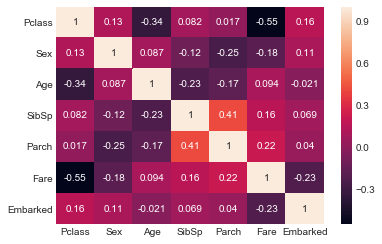

In [90]:
sb.heatmap(X.corr(),annot=True)

In [91]:
#create correlation matrix with absolute values
df_corr = X.corr().abs()
#select upper triangle of matrix
up_tri = df_corr.where(np.triu(np.ones(df_corr.shape[1]),k=1).astype(np.bool))

#find all the features which have a correlation > 0.75 with other features.
corr_features = [ column for column in up_tri.columns if any(up_tri[column]> 0.75)]

#Print Correlated features
print(corr_features)

[]


#### As evident from above no high correlation eists between these features

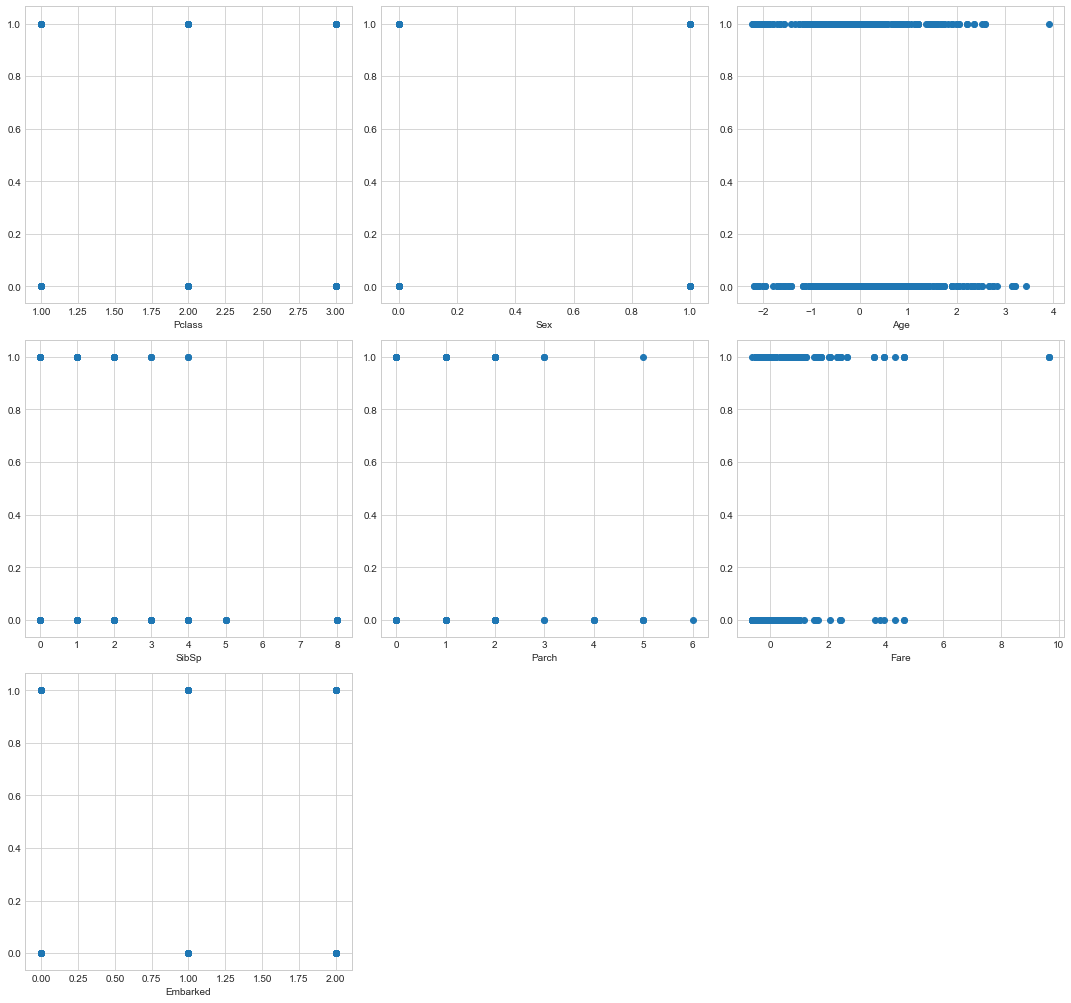

In [92]:
#Features against Survived (label)
fig = plt.figure(figsize = (15,60))
val = X.shape[1]
for idx in range(val):
    feature = X.columns[idx]
    ax = fig.add_subplot(13,3,idx+1)
    Xtmp = X[feature]
    ax.scatter(Xtmp, Y)
    ax.set_xlabel(feature)

plt.tight_layout()
plt.show()

# TRAIN TEST Split the dataset

In [93]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=101)
print("X_train Shape : ",X_train.shape)
print("X_test Shape : ",X_test.shape)
print("Y_train Shape : ",Y_train.shape)
print("Y_test.shape : ",Y_test.shape)

X_train Shape :  (711, 7)
X_test Shape :  (178, 7)
Y_train Shape :  (711,)
Y_test.shape :  (178,)


In [94]:
X.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# CLASSIFICATION USING LOGISTIC REGRESSION

# 10 FOLD CROSS VALIDATON

In [95]:
kfold = KFold(len(X),n_folds=10,shuffle=True,random_state=0)
lr = LogisticRegression()
fold_accuracy = []
for train_fold, valid_fold in kfold:
    train = X.iloc[train_fold] # Extract train data with cv indices
    valid = X.iloc[valid_fold] # Extract valid data with cv indices
    
    train_y = Y.iloc[train_fold]
    valid_y = Y.iloc[valid_fold]
    
    model = lr.fit(train,train_y)
    valid_acc = model.score(X = valid, y = valid_y)
    fold_accuracy.append(valid_acc)    

print("Accuracy per fold: ", fold_accuracy, "\n")
print("Average accuracy: ", sum(fold_accuracy)/len(fold_accuracy))

Accuracy per fold:  [0.6404494382022472, 0.7640449438202247, 0.8764044943820225, 0.7865168539325843, 0.8876404494382022, 0.7865168539325843, 0.8202247191011236, 0.7528089887640449, 0.797752808988764, 0.8409090909090909] 

Average accuracy:  0.7953268641470889


#### Stratified K-Folds cross-validator

Provides train/test indices to split data in train/test sets.

This cross-validation object is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.

In [96]:
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
s_fold_accuracy = []
for train_fold, valid_fold in kfold:
    train = X.iloc[train_fold] # Extract train data with cv indices
    valid = X.iloc[valid_fold] # Extract valid data with cv indices
    
    train_y = Y.iloc[train_fold]
    valid_y = Y.iloc[valid_fold]
    
    model = lr.fit(train,train_y)
    valid_acc = model.score(X = valid, y = valid_y)
    s_fold_accuracy.append(valid_acc)    

print("Accuracy per fold: ", s_fold_accuracy, "\n")
print("Average accuracy: ", sum(s_fold_accuracy)/len(s_fold_accuracy))


Accuracy per fold:  [0.6404494382022472, 0.7640449438202247, 0.8764044943820225, 0.7865168539325843, 0.8876404494382022, 0.7865168539325843, 0.8202247191011236, 0.7528089887640449, 0.797752808988764, 0.8409090909090909] 

Average accuracy:  0.7953268641470889


#### Cross Validation Score for Logistic Regression

In [97]:
from sklearn.cross_validation import cross_val_score
model_result = {}
scores = cross_val_score(estimator= LogisticRegression(),     # Model to test
                X= X,  
                y = Y,      # Target variable
                scoring = "accuracy",               # Scoring metric    
                cv=10)                              # Cross validation folds

print("Accuracy per fold: ")
print("Cross Validation score: ", scores)
print("Average accuracy: ", scores.mean())
model_result['Logistic Regression CV Score'] = scores.mean()

Accuracy per fold: 
Cross Validation score:  [0.7752809  0.79775281 0.76404494 0.84269663 0.78651685 0.7752809
 0.78651685 0.7752809  0.80898876 0.81818182]
Average accuracy:  0.7930541368743615


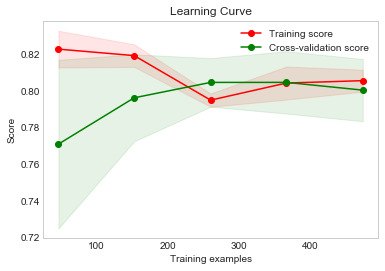

In [98]:
scikitplot.estimators.plot_learning_curve(lr,X_train,Y_train)

In [99]:
Y_pred = lr.predict(X_test)

In [100]:
Y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0], dtype=int64)

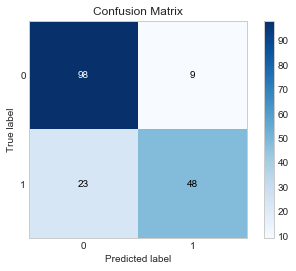

In [101]:
scikitplot.metrics.plot_confusion_matrix(Y_test,Y_pred)

In [102]:
print('Accuracy Score of Logistic Regression Model is  :',accuracy_score(Y_test,Y_pred))
model_result['Logistic Regression Test Accuracy'] = accuracy_score(Y_test,Y_pred)

Accuracy Score of Logistic Regression Model is  : 0.8202247191011236


In [103]:
print('Classification Report  of Logistic Regression Model is  : \n',classification_report(Y_test,Y_pred))

Classification Report  of Logistic Regression Model is  : 
              precision    recall  f1-score   support

          0       0.81      0.92      0.86       107
          1       0.84      0.68      0.75        71

avg / total       0.82      0.82      0.82       178



# RECEIVING OPERABILITY SCORE CURVE(ROC)

In [104]:
X_test.shape

(178, 7)

In [105]:
Y_pred_proba = lr.predict_proba(X_test)

In [106]:
Y_pred_proba.shape

(178, 2)

In [107]:
class_1_prob = []
for i in Y_pred_proba:
    class_1_prob.append(i[1])
print("ROC Score : ",roc_auc_score(Y_test,class_1_prob))

ROC Score :  0.8874555745689088


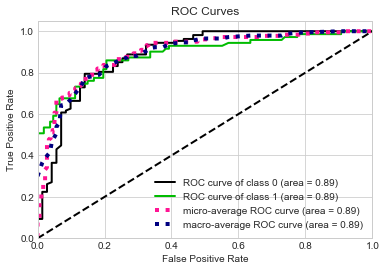

In [108]:
scikitplot.metrics.plot_roc_curve(Y_test,Y_pred_proba)

In [109]:
#Saving Model result
#model_result = {}
model_result['Logistic Regression L2'] = roc_auc_score(Y_test,class_1_prob)

# CLASSIFICATION USING DECISION TREES

# 10 FOLD CROSS VALIDATON

In [110]:
kfold = KFold(len(X),n_folds=10,shuffle=True,random_state=0)
#If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples
dt = tree.DecisionTreeClassifier()
fold_accuracy = []
for train_fold, valid_fold in kfold:
    train = X.iloc[train_fold] # Extract training data with cv indices
    valid = X.iloc[valid_fold] # Extract validation data with cv indices
    
    train_y = Y.iloc[train_fold]
    valid_y = Y.iloc[valid_fold]
    
    model = dt.fit(train,train_y)
    valid_acc = model.score(X = valid, y = valid_y)
    fold_accuracy.append(valid_acc)    

print("Decision Tree Classifier Accuracy per fold: ", fold_accuracy, "\n")
print("Decision Tree Classifier Average accuracy: ", sum(fold_accuracy)/len(fold_accuracy))

Decision Tree Classifier Accuracy per fold:  [0.7528089887640449, 0.7415730337078652, 0.8202247191011236, 0.7640449438202247, 0.7865168539325843, 0.797752808988764, 0.8202247191011236, 0.6966292134831461, 0.8314606741573034, 0.7954545454545454] 

Decision Tree Classifier Average accuracy:  0.7806690500510725


#### Cross Validation Score for Decision Tree Classifier

In [111]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(estimator= tree.DecisionTreeClassifier(random_state=0),     # Model to test
                X= X,  
                y = Y,      # Target variable
                scoring = "accuracy",               # Scoring metric    
                cv=10)                              # Cross validation folds

print("Accuracy per fold: ")
print("Cross Validation score: ", scores)
print("Average accuracy: ", scores.mean())
model_result['Decision Tree Classifier CV Score'] = scores.mean()

Accuracy per fold: 
Cross Validation score:  [0.71910112 0.82022472 0.70786517 0.7752809  0.84269663 0.78651685
 0.80898876 0.73033708 0.83146067 0.80681818]
Average accuracy:  0.7829290091930541


#### 10 -Fold cross validation with tree depth as 2

In [112]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(estimator= tree.DecisionTreeClassifier(max_depth=2,random_state=0),     # Model to test
                X= X,  
                y = Y,      # Target variable
                scoring = "accuracy",               # Scoring metric    
                cv=10)                              # Cross validation folds

print("Accuracy per fold: ")
print("Cross Validation score: ", scores)
print("Average accuracy: ", scores.mean())
model_result['Decision Tree Classifier depth 2 CV Score'] = scores.mean()

Accuracy per fold: 
Cross Validation score:  [0.69662921 0.75280899 0.74157303 0.83146067 0.79775281 0.7752809
 0.76404494 0.74157303 0.82022472 0.76136364]
Average accuracy:  0.7682711950970378


#### 10 -Fold cross validation with tree depth as 4

In [113]:

scores = cross_val_score(estimator= tree.DecisionTreeClassifier(max_depth=4,random_state=0),     # Model to test
                X= X,  
                y = Y,      # Target variable
                scoring = "accuracy",               # Scoring metric    
                cv=10)                              # Cross validation folds

print("Accuracy per fold: ")
print("Cross Validation score: ", scores)
print("Average accuracy: ", scores.mean())
model_result['Decision Tree Classifier depth 4 CV Score'] = scores.mean()

Accuracy per fold: 
Cross Validation score:  [0.71910112 0.80898876 0.75280899 0.86516854 0.85393258 0.7752809
 0.78651685 0.75280899 0.87640449 0.84090909]
Average accuracy:  0.8031920326864148


#### 10 -Fold cross validation with tree depth as 6

In [114]:
scores = cross_val_score(estimator= tree.DecisionTreeClassifier(max_depth=6,random_state=0),     # Model to test
                X= X,  
                y = Y,      # Target variable
                scoring = "accuracy",               # Scoring metric    
                cv=10)                              # Cross validation folds

print("Accuracy per fold: ")
print("Cross Validation score: ", scores)
print("Average accuracy: ", scores.mean())
model_result['Decision Tree Classifier depth 6 CV Score'] = scores.mean()

Accuracy per fold: 
Cross Validation score:  [0.73033708 0.82022472 0.73033708 0.82022472 0.84269663 0.83146067
 0.80898876 0.80898876 0.86516854 0.84090909]
Average accuracy:  0.8099336057201226


#### 10 -Fold cross validation with tree depth as 08

In [115]:
scores = cross_val_score(estimator= tree.DecisionTreeClassifier(max_depth=8,random_state=0),     # Model to test
                X= X,  
                y = Y,      # Target variable
                scoring = "accuracy",               # Scoring metric    
                cv=10)                              # Cross validation folds

print("Accuracy per fold: ")
print("Cross Validation score: ", scores)
print("Average accuracy: ", scores.mean())
model_result['Decision Tree Classifier depth 8 CV Score'] = scores.mean()

Accuracy per fold: 
Cross Validation score:  [0.69662921 0.87640449 0.75280899 0.80898876 0.88764045 0.82022472
 0.80898876 0.76404494 0.8988764  0.79545455]
Average accuracy:  0.8110061287027579


#### 10 -Fold cross validation with tree depth as 10

In [116]:
scores = cross_val_score(estimator= tree.DecisionTreeClassifier(max_depth=10,random_state=0),     # Model to test
                X= X,  
                y = Y,      # Target variable
                scoring = "accuracy",               # Scoring metric    
                cv=10)                              # Cross validation folds

print("Accuracy per fold: ")
print("Cross Validation score: ", scores)
print("Average accuracy: ", scores.mean())
model_result['Decision Tree Classifier depth 10 CV Score'] = scores.mean()

Accuracy per fold: 
Cross Validation score:  [0.70786517 0.82022472 0.70786517 0.82022472 0.85393258 0.79775281
 0.80898876 0.7752809  0.87640449 0.79545455]
Average accuracy:  0.7963993871297241


#### Note:- 
From the above cross valid score it is evident that Decision Tree with Max_depth = 8 has the best cross validation score

Hence using the Decision Tree Classifier model with max_depth as 8 for prediction

In [117]:
kfold = KFold(len(X),n_folds=10,shuffle=True,random_state=0)
dt_8 = tree.DecisionTreeClassifier(max_depth=8,random_state=0)
fold_accuracy = []
for train_fold, valid_fold in kfold:
    train = X.iloc[train_fold] # Extract training data with cv indices
    valid = X.iloc[valid_fold] # Extract validation data with cv indices
    
    train_y = Y.iloc[train_fold]
    valid_y = Y.iloc[valid_fold]
    
    model = dt_8.fit(train,train_y)
    valid_acc = model.score(X = valid, y = valid_y)
    fold_accuracy.append(valid_acc)    

print("Decision Tree Classifier Accuracy per fold: ", fold_accuracy, "\n")
print("Decision Tree Classifier Average accuracy: ", sum(fold_accuracy)/len(fold_accuracy))

Decision Tree Classifier Accuracy per fold:  [0.7528089887640449, 0.7415730337078652, 0.797752808988764, 0.8202247191011236, 0.8764044943820225, 0.8089887640449438, 0.8651685393258427, 0.7640449438202247, 0.8202247191011236, 0.9090909090909091] 

Decision Tree Classifier Average accuracy:  0.8156281920326863


# Display the Decision Tree for the Problem Statement

In [122]:
import graphviz
import os
os.environ["PATH"] += os.pathsep + r'C:\ProgramData\Anaconda3\Library\bin\graphviz'
from IPython.display import Image  


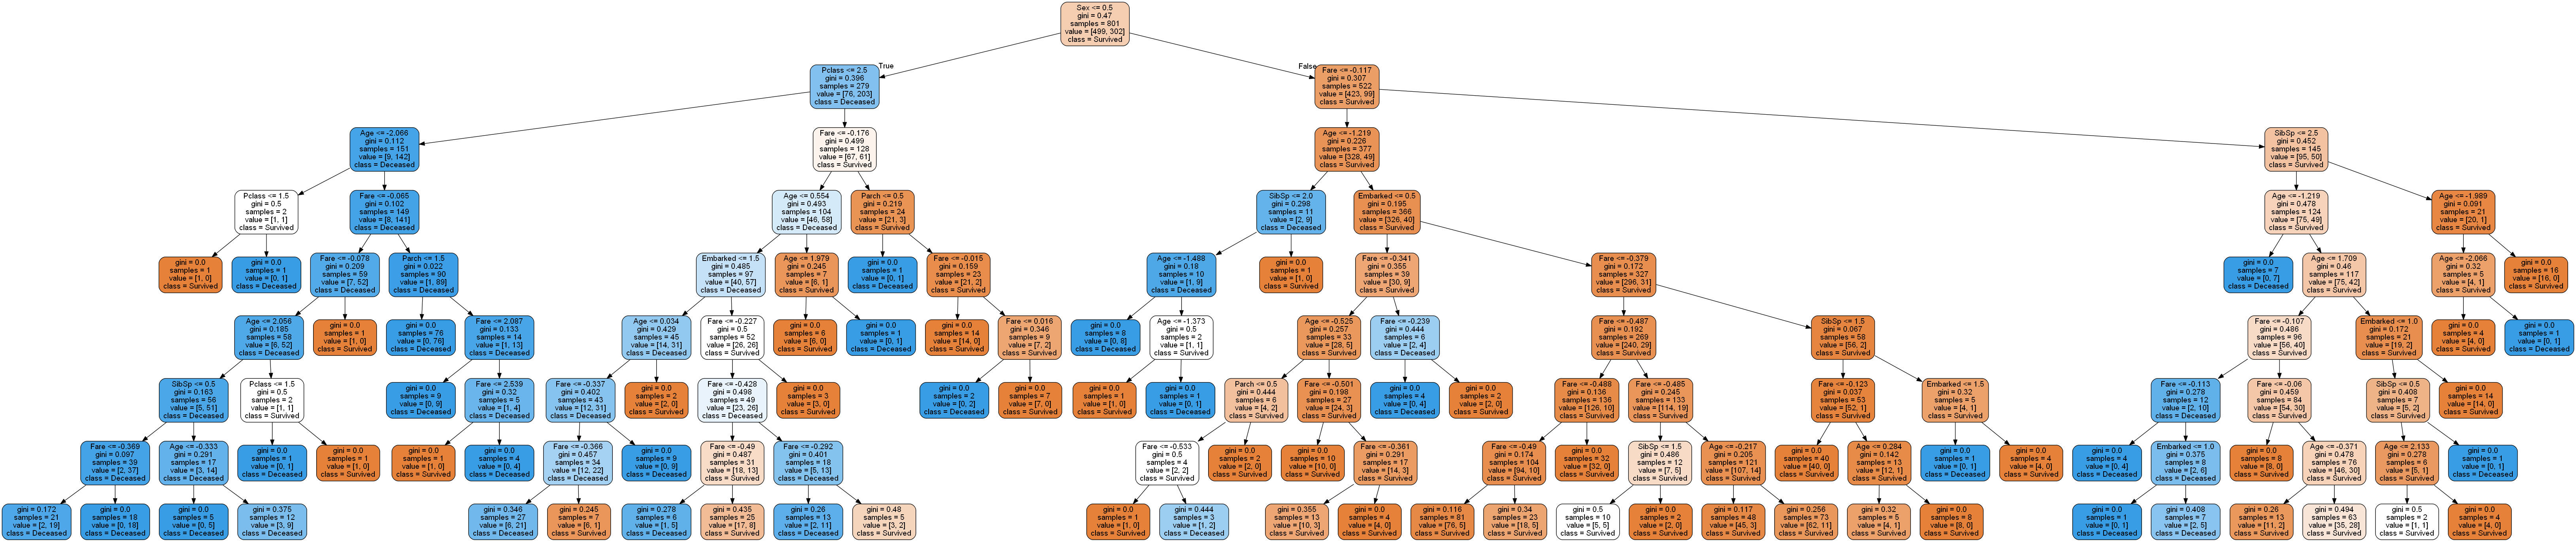

In [123]:
features = X.columns
labels = ['Survived','Deceased']
dot_data = tree.export_graphviz(dt_8, out_file=None, filled=True, rounded=True,
                                feature_names=features,  
                                class_names=labels)
graph = pydotplus.graph_from_dot_data(dot_data)  
display(Image(graph.create_png(),unconfined=True))


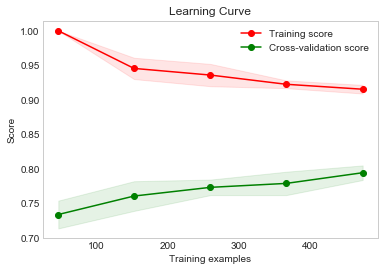

In [124]:
scikitplot.estimators.plot_learning_curve(dt_8,X_train,Y_train)

In [125]:
#Predict the Survival Class for the Test data
Y_pred = dt_8.predict(X_test)
Y_pred_proba = dt_8.predict_proba(X_test)

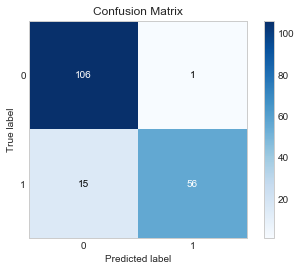

In [126]:
scikitplot.metrics.plot_confusion_matrix(Y_test,Y_pred)

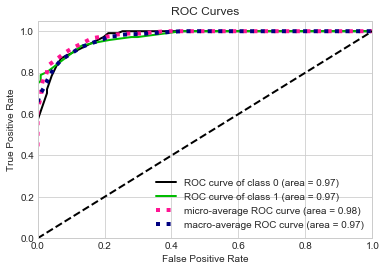

In [127]:
scikitplot.metrics.plot_roc_curve(Y_test,Y_pred_proba)

In [128]:
model_result['Decision Tree Classifier depth 8 Accuracy Score'] = accuracy_score(Y_test,Y_pred)
print('Accuracy Score of Decision Tree Classifier depth 8 : ',accuracy_score(Y_test,Y_pred))

Accuracy Score of Decision Tree Classifier depth 8 :  0.9101123595505618


In [129]:
print('Classification Report of Decision Tree Classifier depth 8 : ',classification_report(Y_test,Y_pred))

Classification Report of Decision Tree Classifier depth 8 :               precision    recall  f1-score   support

          0       0.88      0.99      0.93       107
          1       0.98      0.79      0.88        71

avg / total       0.92      0.91      0.91       178



In [130]:
class_1_prob = []
for i in Y_pred_proba:
    class_1_prob.append(i[1])
print("ROC Score : ",roc_auc_score(Y_test,class_1_prob))
model_result['Decision Tree Classifier depth 8 roc '] = roc_auc_score(Y_test,class_1_prob)

ROC Score :  0.9707779386599975


In [131]:
model_result

{'Logistic Regression CV Score': 0.7930541368743615,
 'Logistic Regression Test Accuracy': 0.8202247191011236,
 'Logistic Regression L2': 0.8874555745689088,
 'Decision Tree Classifier CV Score': 0.7829290091930541,
 'Decision Tree Classifier depth 2 CV Score': 0.7682711950970378,
 'Decision Tree Classifier depth 4 CV Score': 0.8031920326864148,
 'Decision Tree Classifier depth 6 CV Score': 0.8099336057201226,
 'Decision Tree Classifier depth 8 CV Score': 0.8110061287027579,
 'Decision Tree Classifier depth 10 CV Score': 0.7963993871297241,
 'Decision Tree Classifier depth 8 Accuracy Score': 0.9101123595505618,
 'Decision Tree Classifier depth 8 roc ': 0.9707779386599975}

In [132]:
df_scores = pd.DataFrame(model_result,index=np.arange(1))
df_scores

,Logistic Regression CV Score,Logistic Regression Test Accuracy,Logistic Regression L2,Decision Tree Classifier CV Score,Decision Tree Classifier depth 2 CV Score,Decision Tree Classifier depth 4 CV Score,Decision Tree Classifier depth 6 CV Score,Decision Tree Classifier depth 8 CV Score,Decision Tree Classifier depth 10 CV Score,Decision Tree Classifier depth 8 Accuracy Score,Decision Tree Classifier depth 8 roc
0,0.793054,0.820225,0.887456,0.782929,0.768271,0.803192,0.809934,0.811006,0.796399,0.910112,0.970778


# CONCLUSION :
    
* After doing cross validation with max depth as 2,4,6,8,10 we could find that the optimum depth for which the cross validation score was hightest is 8.
* The Decision Tree Classifier has a better cross validation score for max_depth 8 i.e 81%.
* The Decision Tree Classifier for max depth 8 has an accuracy score of 91 % as compared to Logistic Regression Model having an accuracy score of 82 %.

##### We can conclude from above model estimation evaluation that the DECISION TREE CLASSIFIER is better compared to LOGISTIC REGRESSION model.